In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### EXPLORATORY DATA ANALYSIS

<AxesSubplot:xlabel='Churn', ylabel='count'>

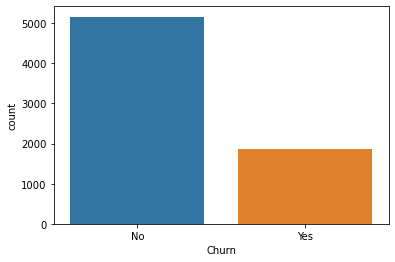

In [8]:
sns.countplot(x = 'Churn', data=df)

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

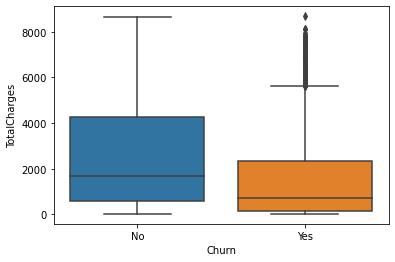

In [9]:
sns.boxplot(x ='Churn',y='TotalCharges',data=df)

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

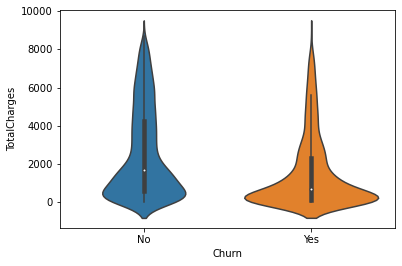

In [10]:
sns.violinplot(x = df['Churn'],y='TotalCharges',data=df)

<AxesSubplot:xlabel='Contract', ylabel='TotalCharges'>

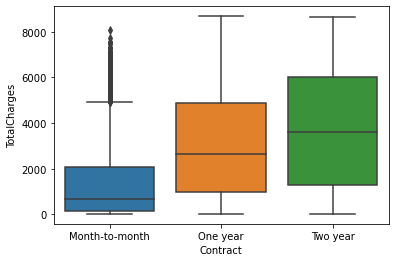

In [11]:
sns.boxplot(y='TotalCharges', x='Contract', data = df)

In [66]:
corr_df  = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

In [67]:
corr_df = corr_df['Churn_Yes'].sort_values().iloc[1:-1]

In [68]:
corr_df = pd.DataFrame(corr_df)

In [69]:
corr_df

,Churn_Yes
Contract_Two year,-0.301552
StreamingMovies_No internet service,-0.227578
StreamingTV_No internet service,-0.227578
TechSupport_No internet service,-0.227578
DeviceProtection_No internet service,-0.227578
OnlineBackup_No internet service,-0.227578
OnlineSecurity_No internet service,-0.227578
InternetService_No,-0.227578
PaperlessBilling_No,-0.191454
Contract_One year,-0.178225


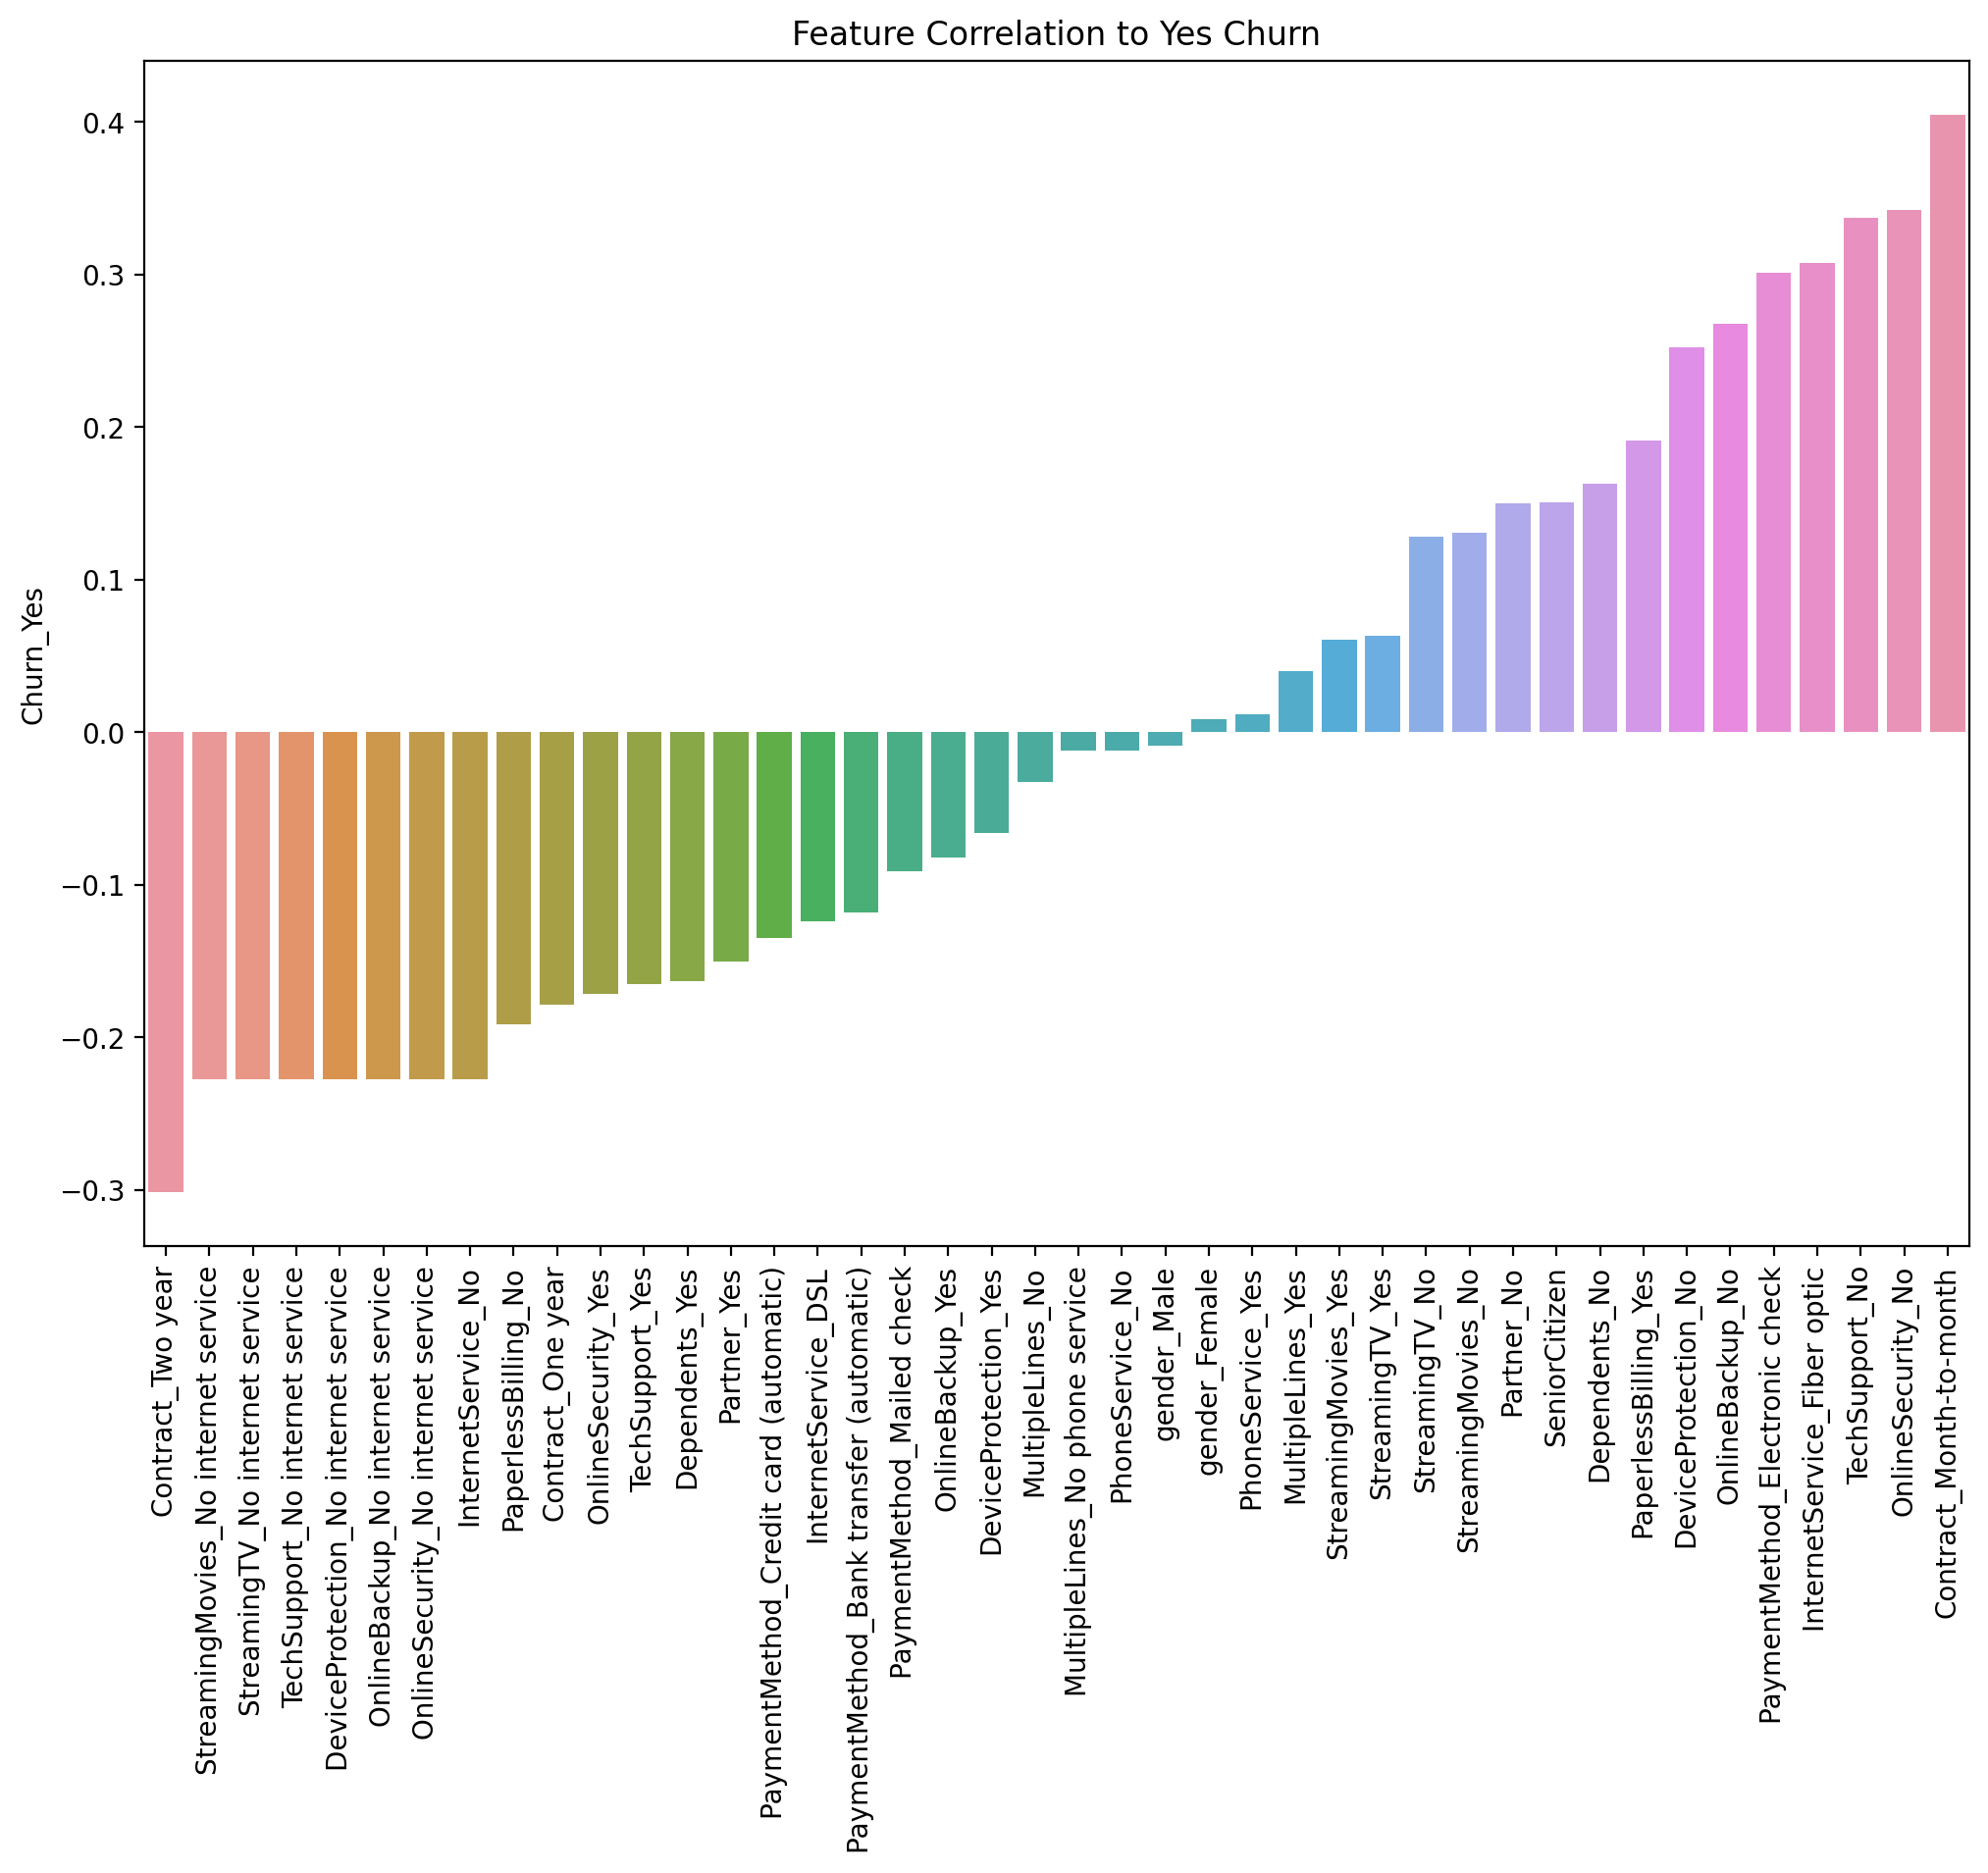

In [73]:
plt.figure(figsize = (12,8), dpi = 200)
sns.barplot(data = corr_df, x = corr_df.index, y='Churn_Yes')
plt.title("Feature Correlation to Yes Churn")
plt.xticks(rotation =90);

### CHURN ANALYSIS

In [76]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

<AxesSubplot:xlabel='tenure', ylabel='Count'>

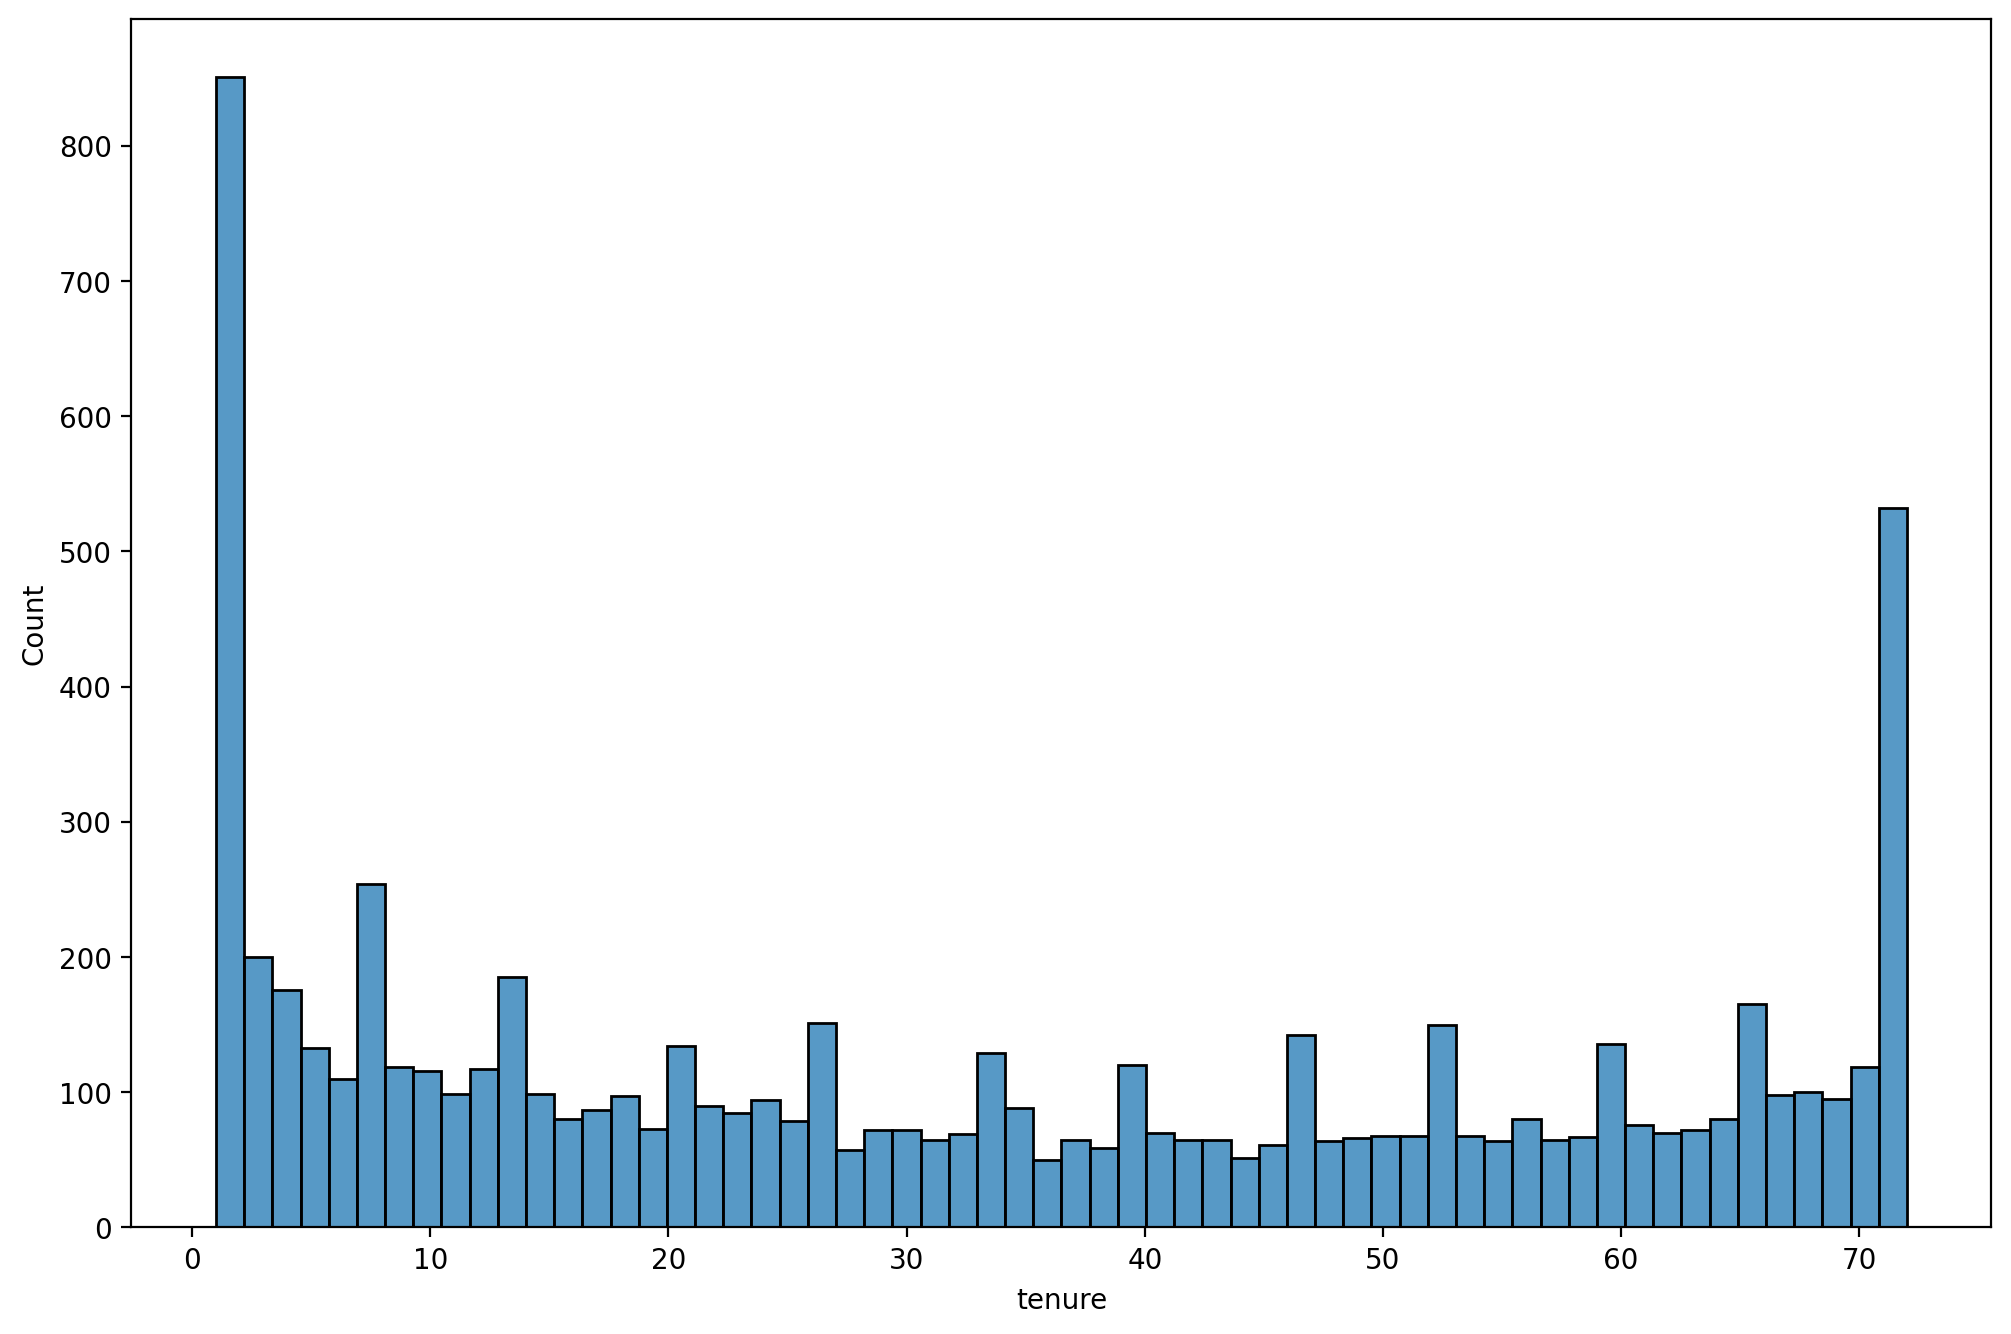

In [86]:
plt.figure(figsize=(12,8), dpi = 200)
sns.histplot(data=df, x='tenure', bins =60)

<Figure size 2400x1600 with 0 Axes>

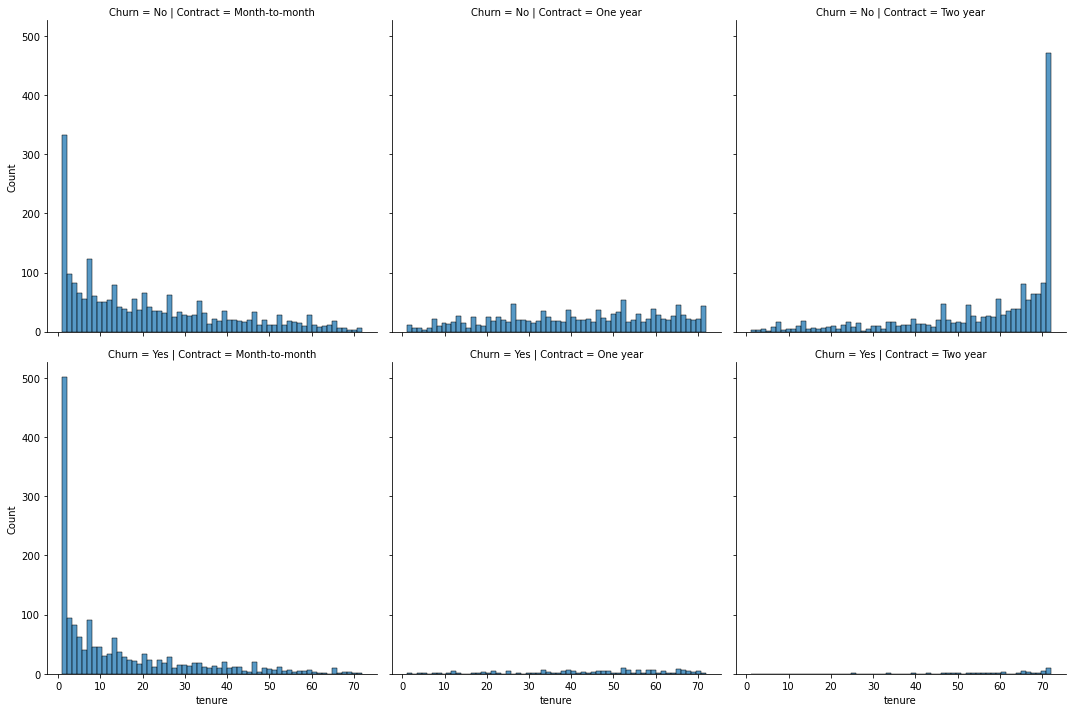

In [98]:
plt.figure(figsize=(12,8), dpi = 200)
sns.displot(data=df, x='tenure', bins=60, col='Contract', row='Churn');


<Figure size 2400x1600 with 0 Axes>

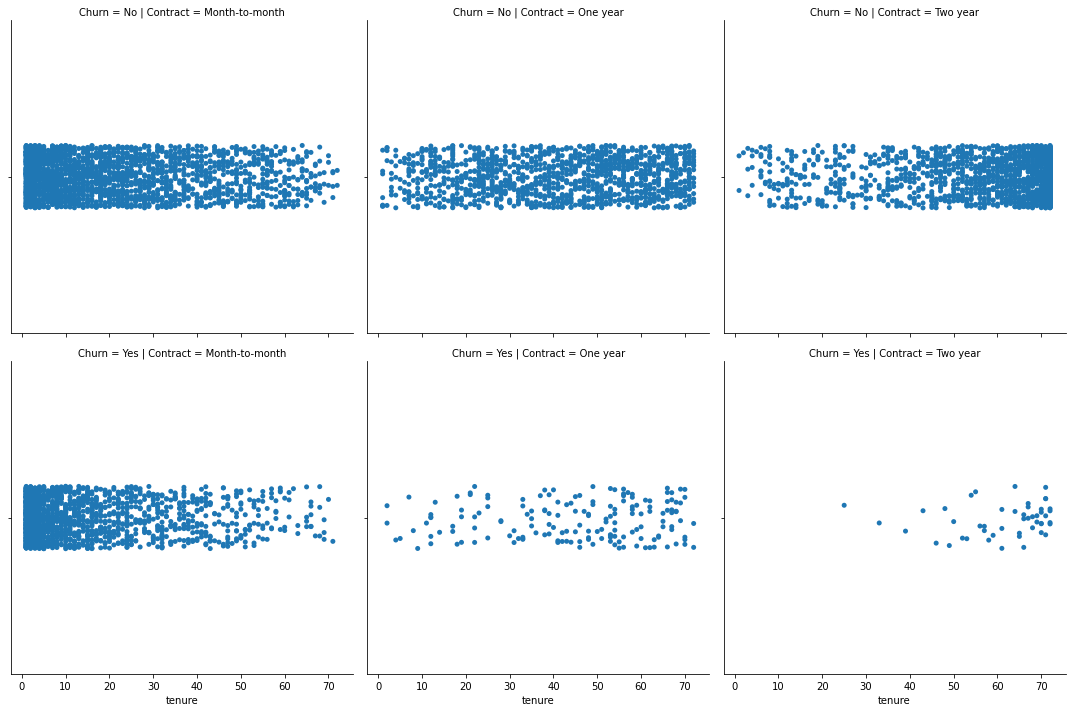

In [102]:
plt.figure(figsize=(12,8), dpi = 200)
sns.catplot(data=df, x='tenure', col='Contract', row='Churn');

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

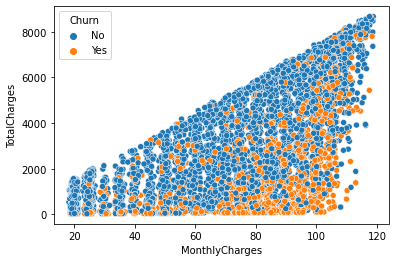

In [100]:
sns.scatterplot(data=df, y='TotalCharges', x='MonthlyCharges', hue='Churn')

### CREATING COHORT ON THE BASIS OF TENURE

In [132]:
yes_churn = df.groupby(['Churn', 'tenure']).count().transpose()['Yes']

In [133]:
yes_churn = yes_churn.transpose()

In [134]:
yes_churn = yes_churn['customerID']

In [135]:
yes_churn

tenure
1     380
2     123
3      94
4      83
5      64
     ... 
68      9
69      8
70     11
71      6
72      6
Name: customerID, Length: 72, dtype: int64

In [164]:
no_churn = df.groupby(['Churn', 'tenure']).count().transpose()['No']
no_churn = no_churn.transpose()

In [166]:
no_churn = no_churn['customerID']

In [167]:
no_churn

tenure
1     233
2     115
3     106
4      93
5      69
     ... 
68     91
69     87
70    108
71    164
72    356
Name: customerID, Length: 72, dtype: int64

In [168]:
total_churn = yes_churn + no_churn

In [169]:
total_churn

tenure
1     613
2     238
3     200
4     176
5     133
     ... 
68    100
69     95
70    119
71    170
72    362
Name: customerID, Length: 72, dtype: int64

In [172]:
churn_percent = (yes_churn/total_churn)*100

In [173]:
churn_percent

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

<AxesSubplot:xlabel='tenure'>

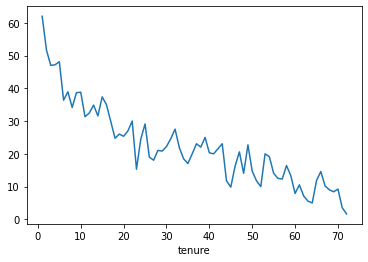

In [174]:
churn_percent.plot()

In [185]:
def cohort(tenure):
    if tenure <13:
        return '0-12 Months'
    elif tenure <25:
        return '12-24 Months'
    elif tenure <49:
        return '24 to 48 Months'
    else:
        return 'Over 48 Months'

In [186]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [187]:
df['Tenure Cohort']

0           0-12 Months
1       24 to 48 Months
2           0-12 Months
3       24 to 48 Months
4           0-12 Months
             ...       
7027       12-24 Months
7028     Over 48 Months
7029        0-12 Months
7030        0-12 Months
7031     Over 48 Months
Name: Tenure Cohort, Length: 7032, dtype: object

In [189]:
df[['Tenure Cohort', 'tenure']]

,Tenure Cohort,tenure
0,0-12 Months,1
1,24 to 48 Months,34
2,0-12 Months,2
3,24 to 48 Months,45
4,0-12 Months,2
...,...,...
7027,12-24 Months,24
7028,Over 48 Months,72
7029,0-12 Months,11
7030,0-12 Months,4


<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

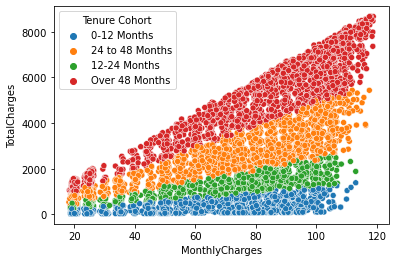

In [190]:
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Tenure Cohort')

<AxesSubplot:xlabel='Tenure Cohort', ylabel='count'>

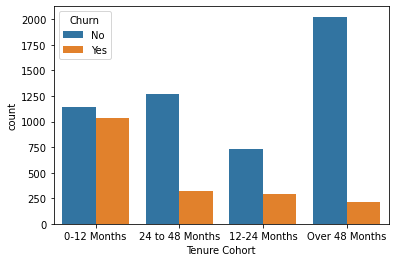

In [191]:
sns.countplot(data=df, x='Tenure Cohort', hue='Churn')

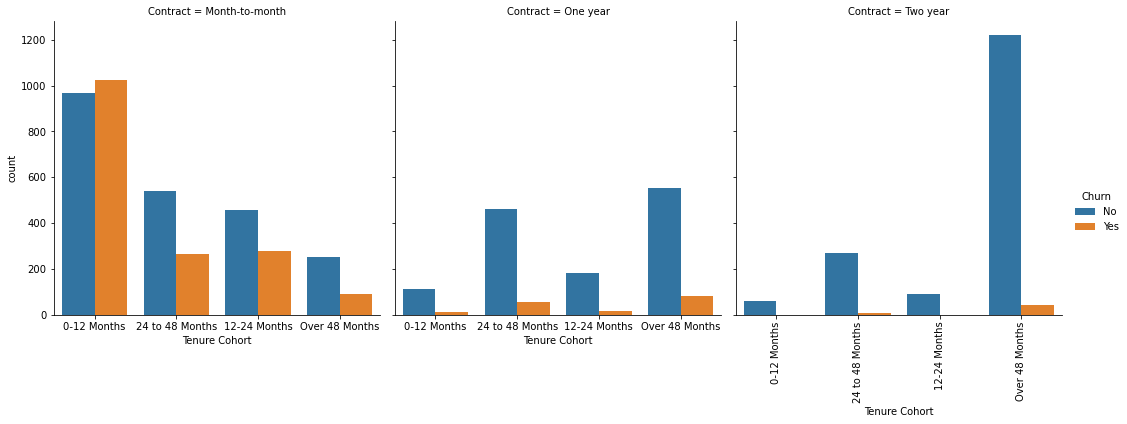

In [201]:
sns.catplot(data=df, x='Tenure Cohort', col='Contract', hue='Churn', kind='count')
plt.xticks(rotation=90);

### PREDICTIVE MODELING

##### SINGLE DECISION TREE

In [214]:
X = pd.get_dummies(df.drop(['Churn', 'customerID'], axis = 1), drop_first=True)

In [215]:
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_cohort_12-24 Months,Tenure Cohort_12-24 Months,Tenure Cohort_24 to 48 Months,Tenure Cohort_Over 48 Months
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,1,0,0,0,0,1,1,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,1,0,0,0,0,0,1,0,1,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,1,1,1,1,0,1,...,1,0,1,0,0,1,1,1,0,0
7028,0,72,103.20,7362.90,0,1,1,1,0,1,...,1,0,1,1,0,0,1,0,0,1
7029,0,11,29.60,346.45,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
7030,1,4,74.40,306.60,1,1,0,1,0,1,...,0,0,1,0,0,1,0,0,0,0


In [210]:
y = pd.get_dummies(df['Churn'], drop_first = True)

In [213]:
y

,Yes
0,0
1,0
2,1
3,0
4,1
...,...
7027,0
7028,0
7029,0
7030,1


In [216]:
from sklearn.model_selection import train_test_split

In [225]:
X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.1, random_state=101)

In [226]:
from sklearn.tree import DecisionTreeClassifier

In [277]:
single_tree = DecisionTreeClassifier(max_depth=6)

In [278]:
single_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [279]:
y_pred = single_tree.predict(X_test)

In [280]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [281]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       557
           1       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


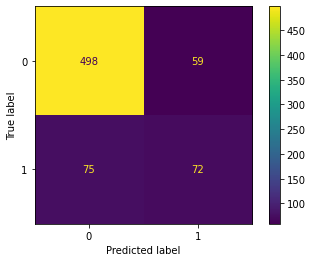

In [282]:
plot_confusion_matrix(single_tree, X_test, y_test)

In [283]:
single_tree.feature_importances_

array([0.0126805 , 0.42391407, 0.04492202, 0.06350564, 0.00123697,
       0.        , 0.        , 0.00785158, 0.        , 0.01243191,
       0.31406016, 0.02628952, 0.        , 0.00837585, 0.        ,
       0.00534132, 0.        , 0.        , 0.        , 0.00786752,
       0.        , 0.        , 0.        , 0.        , 0.01002118,
       0.02706543, 0.        , 0.        , 0.03443632, 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [284]:
imp_feat = pd.DataFrame(data=single_tree.feature_importances_, index = X.columns, columns=['Feature Importances'])

In [285]:
imp_feat[imp_feat.sort_values('Feature Importances') > 0]

,Feature Importances
SeniorCitizen,0.012680
tenure,0.423914
MonthlyCharges,0.044922
TotalCharges,0.063506
gender_Male,0.001237
Partner_Yes,NaN
Dependents_Yes,NaN
PhoneService_Yes,0.007852
MultipleLines_No phone service,NaN
MultipleLines_Yes,0.012432


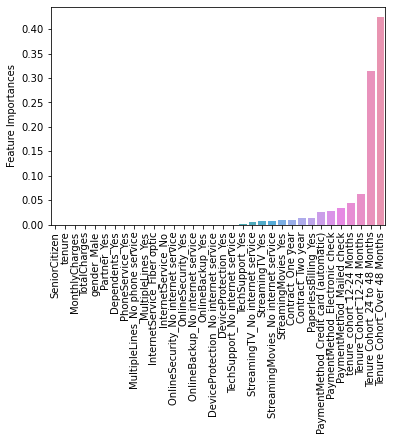

In [286]:
sns.barplot(data=imp_feat.sort_values('Feature Importances')
            , x=imp_feat.index, y='Feature Importances')
plt.xticks(rotation=90);

In [287]:
from sklearn.tree import plot_tree

[Text(0.48522727272727273, 0.9285714285714286, 'tenure <= 17.5\ngini = 0.396\nsamples = 6328\nvalue = [4606, 1722]'),
 Text(0.2375, 0.7857142857142857, 'InternetService_Fiber optic <= 0.5\ngini = 0.497\nsamples = 2387\nvalue = [1287, 1100]'),
 Text(0.1340909090909091, 0.6428571428571429, 'tenure <= 5.5\ngini = 0.412\nsamples = 1343\nvalue = [954, 389]'),
 Text(0.07272727272727272, 0.5, 'InternetService_No <= 0.5\ngini = 0.482\nsamples = 696\nvalue = [414, 282]'),
 Text(0.03636363636363636, 0.35714285714285715, 'SeniorCitizen <= 0.5\ngini = 0.5\nsamples = 421\nvalue = [207, 214]'),
 Text(0.01818181818181818, 0.21428571428571427, 'MonthlyCharges <= 55.225\ngini = 0.499\nsamples = 370\nvalue = [194, 176]'),
 Text(0.00909090909090909, 0.07142857142857142, 'gini = 0.5\nsamples = 298\nvalue = [145, 153]'),
 Text(0.02727272727272727, 0.07142857142857142, 'gini = 0.435\nsamples = 72\nvalue = [49, 23]'),
 Text(0.05454545454545454, 0.21428571428571427, 'MonthlyCharges <= 29.175\ngini = 0.38\nsam

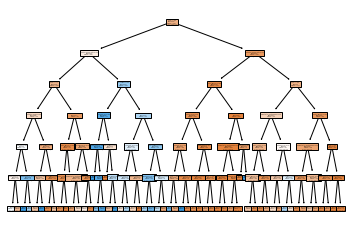

In [288]:
plot_tree(single_tree, filled=True, feature_names=X.columns)

In [242]:
from sklearn.model_selection import GridSearchCV

In [243]:
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [2,3,4,5,6],
    'splitter' : ['best', 'random'],
    'max_features' : ["auto", "sqrt", "log2"]
}

In [244]:
grid = GridSearchCV(single_tree, param_grid)

In [246]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_features='auto'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [247]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [248]:
grid_pred = grid.predict(X_test)

In [249]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       557
           1       0.56      0.46      0.51       147

    accuracy                           0.81       704
   macro avg       0.71      0.68      0.70       704
weighted avg       0.80      0.81      0.81       704



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


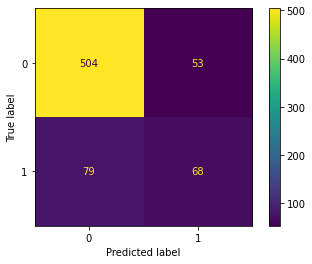

In [250]:
plot_confusion_matrix(grid, X_test, y_test)

In [290]:
imp_feat = grid.best_estimator_.feature_importances_

array([0.00125089, 0.26514438, 0.02012536, 0.08382938, 0.00183628,
       0.00212509, 0.00608596, 0.        , 0.        , 0.        ,
       0.30795294, 0.01619828, 0.        , 0.01024212, 0.01725047,
       0.00096502, 0.01011446, 0.00280964, 0.        , 0.05090789,
       0.        , 0.00176372, 0.        , 0.00658526, 0.        ,
       0.02282701, 0.02539064, 0.00183053, 0.00365428, 0.00483086,
       0.10044867, 0.0089835 , 0.02684737, 0.        ])

In [296]:
imp_feat = pd.DataFrame(data=imp_feat, index=X.columns, columns=['Feature Importances']).sort_values('Feature Importances')

In [300]:
imp_feat = imp_feat[imp_feat > 0]

In [310]:
imp_feat = imp_feat.dropna()

In [312]:
imp_feat

,Feature Importances
gender_Male,0.001237
OnlineBackup_Yes,0.005341
PhoneService_Yes,0.007852
TechSupport_Yes,0.007868
OnlineSecurity_Yes,0.008376
Contract_One year,0.010021
MultipleLines_Yes,0.012432
SeniorCitizen,0.012680
InternetService_No,0.026290
Contract_Two year,0.027065


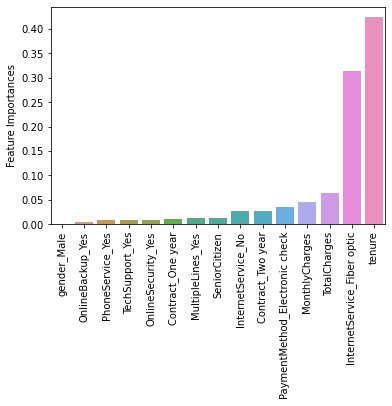

In [317]:
sns.barplot(data=imp_feat, x=imp_feat.index, y='Feature Importances')
plt.xticks(rotation=90);

In [318]:
from sklearn.tree import plot_tree

[Text(0.5212155963302753, 0.9285714285714286, 'InternetService_Fiber optic <= 0.5\nentropy = 0.844\nsamples = 6328\nvalue = [4606, 1722]'),
 Text(0.2706422018348624, 0.7857142857142857, 'PaperlessBilling_Yes <= 0.5\nentropy = 0.606\nsamples = 3513\nvalue = [2992, 521]'),
 Text(0.1444954128440367, 0.6428571428571429, 'tenure_cohort_12-24 Months <= 0.5\nentropy = 0.51\nsamples = 1938\nvalue = [1718, 220]'),
 Text(0.07339449541284404, 0.5, 'InternetService_No <= 0.5\nentropy = 0.825\nsamples = 630\nvalue = [467, 163]'),
 Text(0.03669724770642202, 0.35714285714285715, 'PaymentMethod_Electronic check <= 0.5\nentropy = 0.943\nsamples = 305\nvalue = [195, 110]'),
 Text(0.01834862385321101, 0.21428571428571427, 'StreamingMovies_Yes <= 0.5\nentropy = 0.905\nsamples = 209\nvalue = [142, 67]'),
 Text(0.009174311926605505, 0.07142857142857142, 'entropy = 0.937\nsamples = 170\nvalue = [110, 60]'),
 Text(0.027522935779816515, 0.07142857142857142, 'entropy = 0.679\nsamples = 39\nvalue = [32, 7]'),
 T

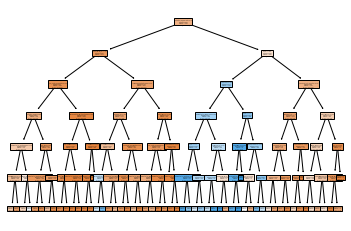

In [320]:
plot_tree(grid.best_estimator_, filled = True, feature_names=X.columns)

### RANDOM FORREST

In [321]:
from sklearn.ensemble import RandomForestClassifier

In [322]:
rf_model = RandomForestClassifier(n_estimators=100)

In [325]:
rf_model.fit(X_train, y_train)

C:\Users\Dell\AppData\Local\Temp\ipykernel_804\223814155.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


RandomForestClassifier()

In [326]:
rf_pred=rf_model.predict(X_test)

In [330]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       557
           1       0.53      0.47      0.50       147

    accuracy                           0.80       704
   macro avg       0.70      0.68      0.69       704
weighted avg       0.80      0.80      0.80       704



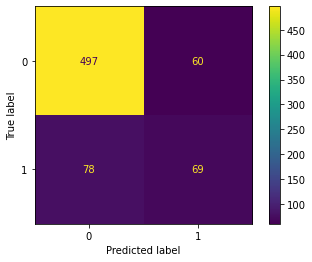

In [332]:
plot_confusion_matrix(rf_model, X_test, y_test)

### BOOSTED TREES

In [348]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

In [349]:
ada_model = AdaBoostClassifier(n_estimators=100)

In [350]:
ada_model.fit(X_train, y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(n_estimators=100)

In [351]:
ada_pred = ada_model.predict(X_test)

In [352]:
print(classification_report(y_test, ada_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       557
           1       0.63      0.53      0.58       147

    accuracy                           0.84       704
   macro avg       0.76      0.72      0.74       704
weighted avg       0.83      0.84      0.83       704



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


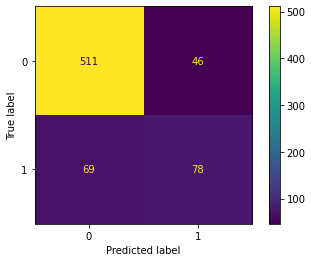

In [353]:
plot_confusion_matrix(ada_model, X_test, y_test)

In [354]:
gb_model = GradientBoostingClassifier(n_estimators=100)

In [355]:
gb_model.fit(X_train, y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [356]:
gb_pred = gb_model.predict(X_test)

In [357]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       557
           1       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


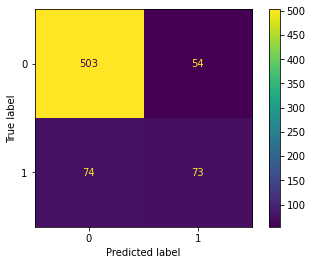

In [358]:
plot_confusion_matrix(gb_model, X_test, y_test)

In [ ]:
# The best model for Churn data set is Ada Boost